<a href="https://colab.research.google.com/github/alcarvalhox/inteligencia_vagoes/blob/main/Analise_vagoes_2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install autoplotter

In [4]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from autoplotter import run_app

/usr/local/lib/python3.7/dist-packages/dash_bootstrap_components/_table.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/usr/local/lib/python3.7/dist-packages/autoplotter/app.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/usr/local/lib/python3.7/dist-packages/autoplotter/homepage.py:1: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table as dt


In [5]:
bd = pd.read_excel("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/BD_UNIFICADO_v4.xlsx",engine='openpyxl')

In [10]:
bd.to_csv("bd.csv",index=False)

In [11]:
bd = pd.read_csv("bd.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,7,10,16,17,18,22,25,26,32,33,36,50,52,53,58,61,62,63,64,65,68,72,73,77,78,79,80,81,82) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [188]:
bd.dtypes

Horário do trem       object
ID_VEICULO            object
Problema             float64
Tipo de sensor        object
Número do veículo    float64
                      ...   
Problema.1            object
Sumário               object
Remoção               object
Motivo                object
Condição              object
Length: 83, dtype: object

In [189]:
bd['Horário do trem'] = pd.to_datetime(bd['Horário do trem'])

In [190]:
bd['Horário do trem'] = bd['Horário do trem'].dt.strftime('%d/%m/%Y')

In [191]:
bd['Horário do trem'].unique()

array(['01/01/2020', '01/01/2021', '02/01/2013', '02/01/2018',
       '02/01/2020', '02/01/2021', '03/01/2020', '04/01/2014',
       '04/01/2020', '05/01/2020', '06/01/2010', '06/01/2020',
       '07/01/2020', '08/01/2020', '09/01/2010', '09/01/2020',
       '10/01/2019', '10/01/2020', '11/01/2011', '11/01/2020',
       '12/01/2020', '01/02/2020', '01/02/2021', '02/02/2020',
       '02/02/2021', '03/02/2020', '04/02/2014', '04/02/2015',
       '04/02/2020', '05/02/2020', '06/02/2020', '07/02/2019',
       '07/02/2020', '08/02/2015', '08/02/2018', '08/02/2020',
       '09/02/2020', '10/02/2014', '10/02/2018', '10/02/2019',
       '10/02/2020', '11/02/2020', '12/02/2020', '01/03/2020',
       '01/03/2021', '02/03/2020', '02/03/2021', '03/03/2020',
       '04/03/2020', '05/03/2020', '06/03/2020', '07/03/2020',
       '08/03/2015', '08/03/2018', '08/03/2020', '09/03/2010',
       '09/03/2020', '10/03/2017', '10/03/2020', '11/03/2020',
       '12/03/2010', '12/03/2020', '01/04/2020', '02/04

In [192]:
bd["Falha de rolamento"] = bd["Falha de rolamento"].replace({"RS3": 3,"NOISY(RS3)":0,"FBS(RS2)":0,"RS3_p":3,"RS1_p":1,"RS1_e":1,
                                       "FBS(4)":0,"RS1":1,"RS2":2,"NOISY(RS2)":0,"FBS(RS3)":0,"RS2_n":2,
                                       "FBS(RS1)":0,"NOISY(4)":0,"RS2_p":2,"RS1_n":1,"FBS(RS1_p)":0,"RS3_n":3,
                                       "NOISY(RS1)":0,"FBS(RS1_e)":0,"Shrk(4)":0,"RS3_m":3,"Shrk(RS3)":0,
                                       "FBS(RS1_n)":0,"Shrk(RS2)":0,"RS2_m":2,"NOISY(RS1_p)":0,"FBS(RS3_p)":0,
                                       "Shrk(RS1)":0,"RS2_r":2,"RS3_r":3,"FBS(RS2_p)":0,"Clpd(4)":0,
                                       "Clpd(RS1)":0,"FBS(RS2_n)":0})

In [193]:
bd['Falha de rolamento'].unique()

array([nan, '.', 3, 2, 0, 1], dtype=object)

In [194]:
bd['Cod-falha_rolamento'].unique()

array([0.5, 1. , 0. , 2. , 3.5, 3. , 1.5, 2.5])

In [195]:
bd['Cod-falha_rolamento'] = bd['Cod-falha_rolamento'].fillna(0.0)

In [196]:
bd['ID_VEICULO'] = bd['ID_VEICULO'].fillna(0.0)

In [19]:
bd['ID_VEICULO'].unique()

array([732249., 732017., 733295., 734725., 731332., 732991., 729423.,
       735696., 616773., 732757.,  13063., 731595., 732239., 612228.,
       617123., 624318., 612134., 728903., 733291., 733750., 730662.,
       728272.,      0.])

In [25]:
bd['Lateral do veículo'].dtype

dtype('O')

In [197]:
bd = bd.sort_values(by='Horário do trem', ascending=True)

In [20]:
vagao = 730662
lateral = "R"
eixo = 3

In [26]:
subset = bd[(bd['ID_VEICULO'] == vagao)]# & (bd['Lateral do veículo'] == lateral)]

In [183]:
subset['Horário do trem'] = pd.to_datetime(subset['Horário do trem'])

In [184]:
subset['Horário do trem'] = subset['Horário do trem'].dt.strftime('%d/%m/%Y')

In [29]:
subset['Horário do trem'].unique()

array(['30/12/2009', '30/10/2020', '30/08/2020', '30/07/2020',
       '30/05/2020', '30/04/2020', '30/03/2020', '29/11/2020',
       '29/11/2011', '29/09/2020', '29/07/2015', '28/10/2020',
       '28/06/2020', '28/03/2020', '27/12/2020', '27/11/2020',
       '27/09/2020', '27/08/2020', '27/04/2020', '26/12/2020',
       '26/07/2020', '26/05/2020', '26/04/2020', '25/08/2020',
       '25/06/2020', '24/10/2020', '24/07/2020', '24/03/2020',
       '23/12/2020', '23/11/2020', '23/06/2020', '23/05/2020',
       '22/12/2020', '22/09/2020', '22/08/2020', '21/11/2020',
       '21/10/2020', '21/07/2020', '21/06/2020', '21/05/2020',
       '21/04/2020', '21/03/2020', '20/11/2020', '20/10/2020',
       '19/12/2020', '19/09/2020', '19/08/2020', '19/06/2020',
       '18/05/2020', '17/10/2020', '17/07/2020', '16/12/2020',
       '16/08/2020', '16/06/2020', '16/05/2020', '16/04/2020',
       '16/03/2020', '14/12/2020', '14/10/2020', '14/09/2020',
       '14/08/2020', '13/09/2020', '13/07/2020', '13/06

In [180]:
subset.dtypes

Horário do trem       object
ID_VEICULO           float64
Problema             float64
Tipo de sensor        object
Número do veículo    float64
                      ...   
Problema.1            object
Sumário               object
Remoção               object
Motivo                object
Condição              object
Length: 83, dtype: object

In [30]:
subset = subset.sort_values(by='Horário do trem', ascending=False)

In [31]:
subset['Cod-falha_rolamento'].unique()

array([0. , 0.5, 2. , 1. , 3.5, 1.5, 3. ])

In [32]:
subset['Problema'].unique()

array([nan,  0.,  1.])

In [144]:
subset['ErsDB_MM'] = subset['ErsDB'].rolling(window=5).mean()

In [135]:
subset.head()

,Horário do trem,ID_VEICULO,Problema,Tipo de sensor,Número do veículo,Número do eixo do trem,Número do eixo do veículo,Lateral do veículo,Velocidade do eixo,Extremidade do eixo,Lateral da linha,Força de pico de impacto da roda (kN),Alerta de pico de impacto da roda,Alerta de impacto normalizado da roda (kN),Peso da roda (t),Carga média da roda lateral do truque (t),Direção,Lateral da linha.1,Falha de rolamento,Cod-falha_rolamento,Alerta de rolamento,Consistente,Achatamento de pista de roda,ErsDB,ID_GRUPO_MEDC_HBD,DT_INCS_GRUPO_MEDC_HBD,IC_SNTD_TREM,ID_EQPT_MNTR,QT_EIXO_LIDO_SNSR_A,QT_EIXO_LIDO_SNSR_B,CD_PRFX_ATUAL_TREM_ASSD,VE_SAIDA_TREM_EQPT_HBD,DC_EQPT_MNTR,CD_EQPT_MNTR,NU_VEIC,NU_RDRO_TREM,DT_MEDC_HBD,TE_RODA_LADO_ESQD,TE_RODA_LADO_DRTO,TE_RLMT_LADO_ESQD,...,DC_TIPO_ALRM_ALRT,VL_LIMT_ALRM_EQPT_MNTR,VL_ALRM_ALRT,ID_NIVEL_SVRD_ALRM_ALRT,ID_ALRM_EQPT_MNTR,CD_TIPO_ALRM_EQPT_MNTR,DC_TIPO_ALRM_EQPT_MNTR,ID_NIVEL_SRVD_ALRM_EQPT_MNTR,CD_NIVEL_SVRD_ALRM_EQPT_MNTR,CD_COR_ALRM_EQPT_MNTR,NU_PRIO_ALRM_EQPT_MNTR,POSSUI_PERFIL,POSSUI_CORRECAO,Instância Componente,Item Componente,Série Componente,Referência Externa,Descrição Componente,Posição,Data Transação,Tipo Transação,Data Disposição,Contador Dias,Contador Km,Configuração Mestre Componente,Ativo Componente,Numero Visita,Ativo Visita,Tipo Visita,Exigência,Operação,Não Rotina Odem Serviço,Não Rotina,Status Não Rotina,Problema.1,Sumário,Remoção,Motivo,Condição,ErsDB_MM
28392,30/12/2020,732017.0,NaN,RAILBAM,NaN,421.0,4.0,R,50.0,B,NaN,NaN,NaN,NaN,NaN,NaN,Sentido RJ,Distante,.,0.5,0.0,NaN,.,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14010,30/12/2020,732017.0,NaN,WCM2,105.0,422.0,3.0,R,49.0,B,Distante,197.0,0.0,153.0,19.8,19.8,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14014,30/12/2020,732017.0,NaN,WCM2,105.0,424.0,1.0,R,49.0,B,Distante,199.0,0.0,153.0,20.0,19.7,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28394,30/12/2020,732017.0,NaN,RAILBAM,NaN,422.0,3.0,R,50.0,B,NaN,NaN,NaN,NaN,NaN,NaN,Sentido RJ,Distante,.,0.5,0.0,NaN,.,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28396,30/12/2020,732017.0,NaN,RAILBAM,NaN,423.0,2.0,R,50.0,B,NaN,NaN,NaN,NaN,NaN,NaN,Sentido RJ,Distante,RS1,3.0,0.0,1.0,.,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


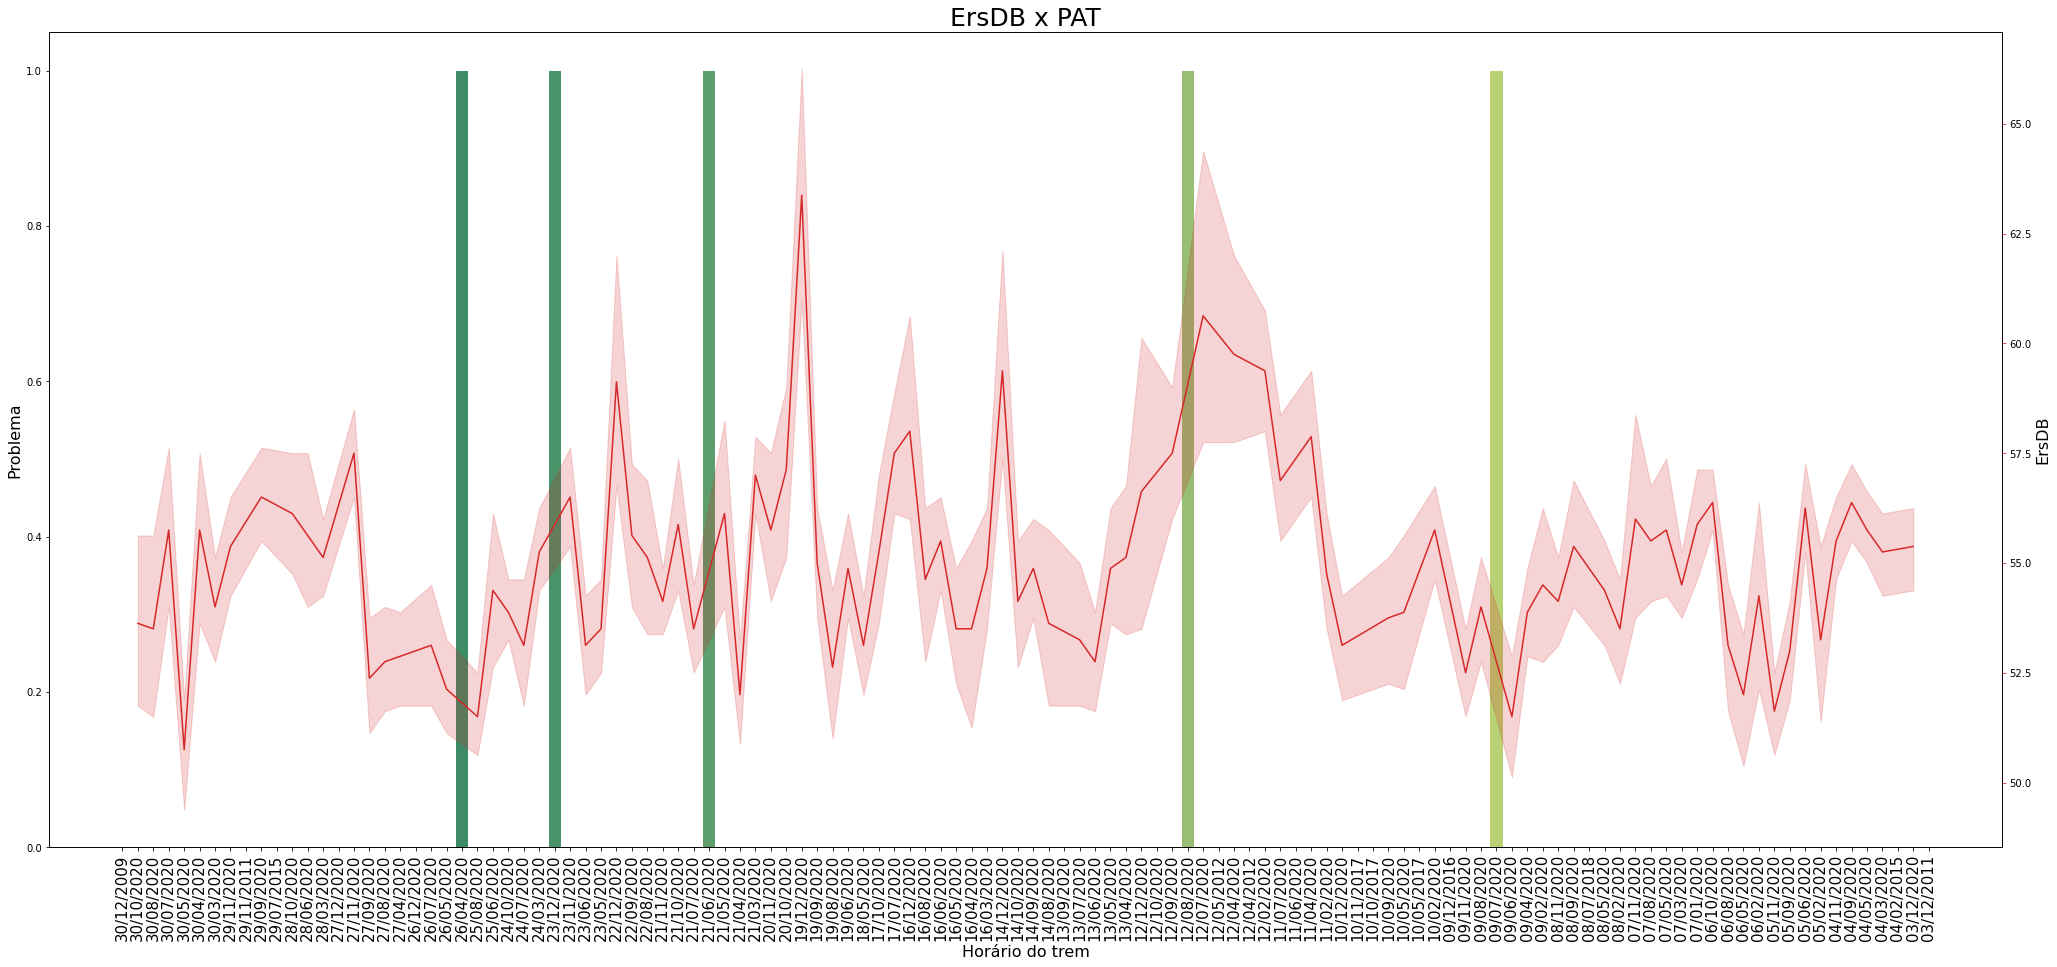

In [145]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(35,15))
color = 'tab:green'
#bar plot creation
ax1.set_title('ErsDB x PAT', fontsize=25)
ax1.set_xlabel('Data', fontsize=16)
ax1.set_ylabel('PAT', fontsize=16)
plt.xticks(rotation=90 , size = 15)
ax1 = sns.barplot(x=subset['Horário do trem'], y=subset['Problema'], data = subset, palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('ErsDB', fontsize=16)
ax2 = sns.lineplot(x=subset['Horário do trem'], y=subset['ErsDB'], data = subset, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

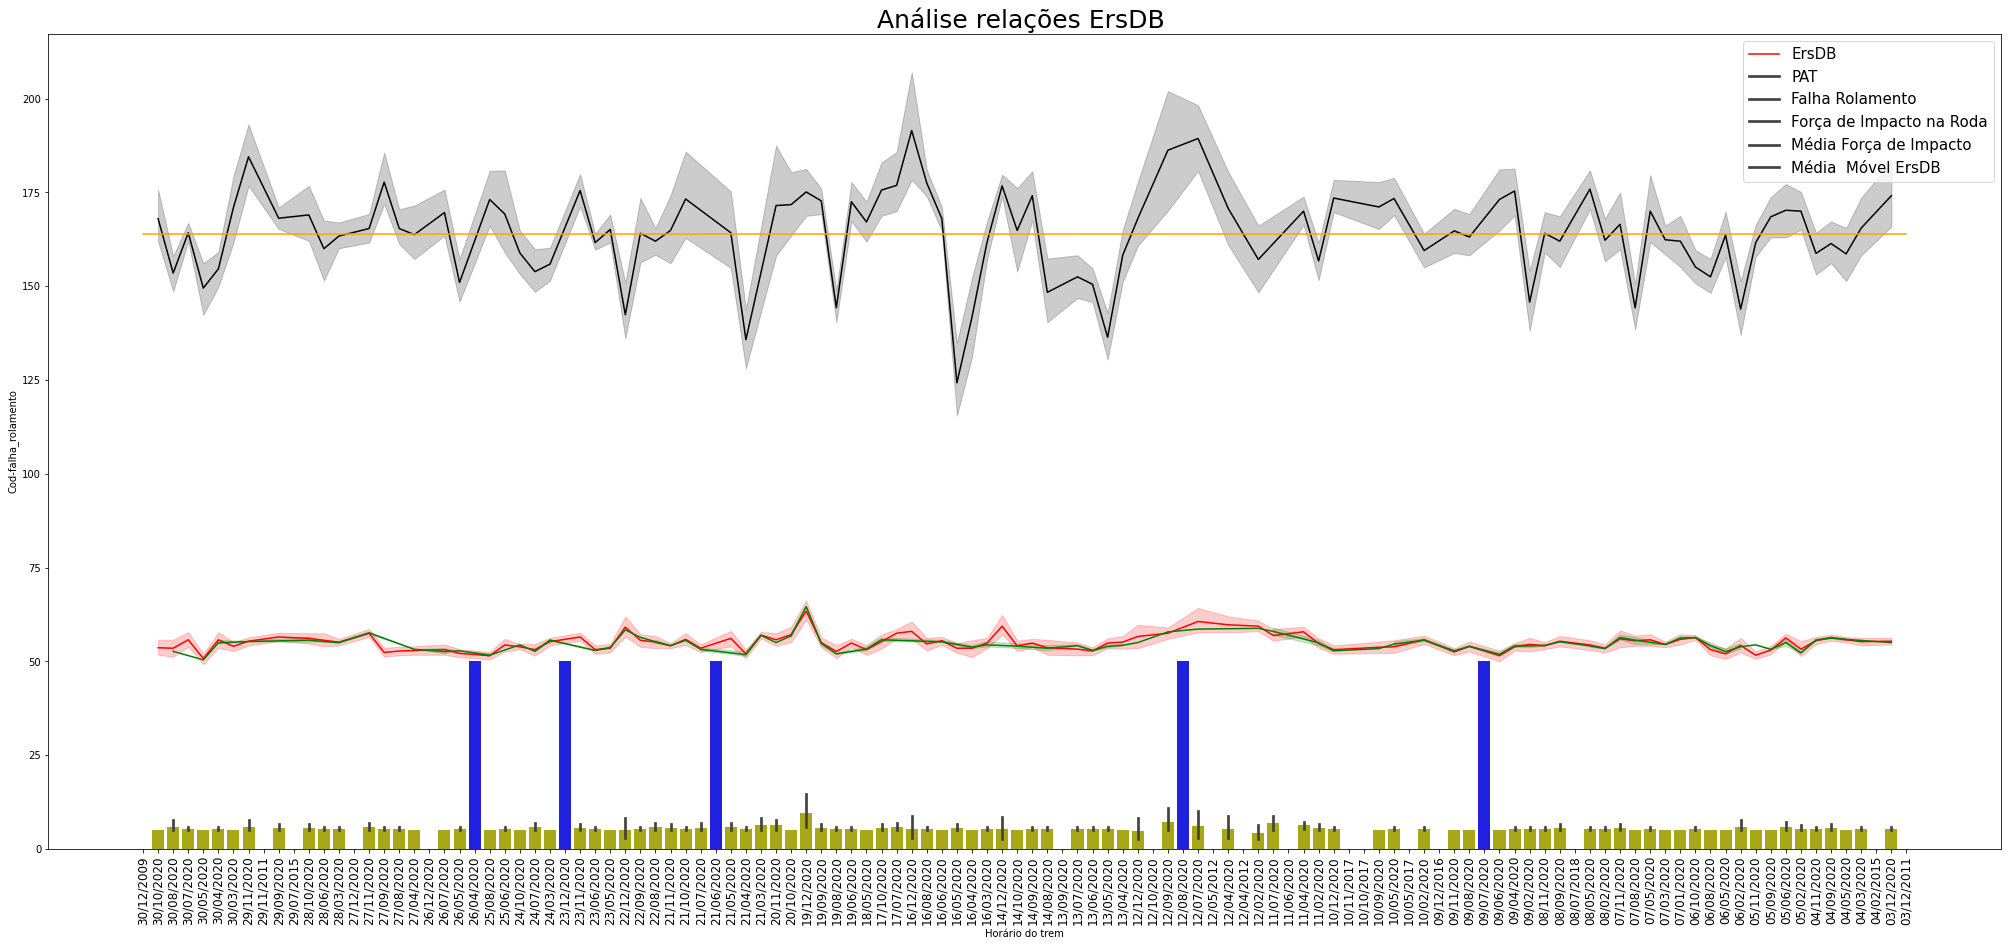

In [146]:
fig, ax = plt.subplots(figsize=(35,15))

ax.set_title(' Análise relações ErsDB  ' , fontsize=25)


sns.lineplot(x=subset['Horário do trem'], 
             y=subset['ErsDB'],
             color='r',
             ax=ax)
sns.barplot(x=subset['Horário do trem'], 
             y=50*(subset['Problema']), 
             color='blue',
             ax=ax)   
sns.barplot(x=subset['Horário do trem'], 
             y=10*(subset['Cod-falha_rolamento']), 
             color='y',
             ax=ax)  
sns.lineplot(x=subset['Horário do trem'], 
             y=(subset['Força de pico de impacto da roda (kN)']), 
             color='black',
             ax=ax)  
sns.lineplot(x=subset['Horário do trem'], 
             y=np.mean(subset['Força de pico de impacto da roda (kN)']), 
             color='orange',
             ax=ax)  
sns.lineplot(x=subset['Horário do trem'], 
             y=(subset['ErsDB_MM']), 
             color='green',
             ax=ax)  



ax.legend(['ErsDB', 'PAT','Falha Rolamento','Força de Impacto na Roda','Média Força de Impacto','Média  Móvel ErsDB'],fontsize = 15, facecolor='w')

plt.xticks(rotation=90 , size = 12)

plt.show()

In [185]:
subset = subset.sort_values(by='Horário do trem', ascending=True)

In [1]:
run_app(bd,mode='inline')

NameError: ignored

In [81]:
veiculos = ['732249.0','732017.0','733295.0','734725.0','731332.0','732991.0','729423.0','735696.0','616773.0','732757.0','13063.0','731595.0','732239.0','612228.0','617123.0','624318.0','612134.0','728903.0','733291.0','733750.0','730662.0','728272.0']

In [3]:
colunas = ['ErsDB_Média','ErsDB_DP','ErsDB_sem_out','PAT1','ErsDB_Média_1','ErsDB_DP_1','PAT2','ErsDB_Média_2','ErsDB_DP_2','PAT3','ErsDB_Média_3','ErsDB_DP_3','PAT4','ErsDB_Média_4','ErsDB_DP_4','PAT5','ErsDB_Média_5','ErsDB_DP_5','PAT6','ErsDB_Média_6','ErsDB_DP_6','PAT7','ErsDB_Média_7','ErsDB_DP_7' ]

In [2]:
len(veiculos)

22

In [134]:
bd = bd.sort_values(by='Horário do trem', ascending=True)

In [2]:
bd.head()

NameError: ignored

In [136]:
bd['ID_VEICULO'] = bd['ID_VEICULO'].astype(str)

In [137]:
sub = bd[(bd['ID_VEICULO'] == veiculos[0]) & (bd['Tipo de sensor'] == 'RAILBAM')]

In [141]:
sub = sub.sort_values(by='Horário do trem', ascending=True)

In [142]:
bd['ID_VEICULO'] = bd['ID_VEICULO'].fillna(0.0)

In [143]:
sub.reset_index()

,index,Horário do trem,ID_VEICULO,Problema,Tipo de sensor,Número do veículo,Número do eixo do trem,Número do eixo do veículo,Lateral do veículo,Velocidade do eixo,Extremidade do eixo,Lateral da linha,Força de pico de impacto da roda (kN),Alerta de pico de impacto da roda,Alerta de impacto normalizado da roda (kN),Peso da roda (t),Carga média da roda lateral do truque (t),Direção,Lateral da linha.1,Falha de rolamento,Cod-falha_rolamento,Alerta de rolamento,Consistente,Achatamento de pista de roda,ErsDB,ID_GRUPO_MEDC_HBD,DT_INCS_GRUPO_MEDC_HBD,IC_SNTD_TREM,ID_EQPT_MNTR,QT_EIXO_LIDO_SNSR_A,QT_EIXO_LIDO_SNSR_B,CD_PRFX_ATUAL_TREM_ASSD,VE_SAIDA_TREM_EQPT_HBD,DC_EQPT_MNTR,CD_EQPT_MNTR,NU_VEIC,NU_RDRO_TREM,DT_MEDC_HBD,TE_RODA_LADO_ESQD,TE_RODA_LADO_DRTO,...,CD_TIPO_ALRM_ALRT,DC_TIPO_ALRM_ALRT,VL_LIMT_ALRM_EQPT_MNTR,VL_ALRM_ALRT,ID_NIVEL_SVRD_ALRM_ALRT,ID_ALRM_EQPT_MNTR,CD_TIPO_ALRM_EQPT_MNTR,DC_TIPO_ALRM_EQPT_MNTR,ID_NIVEL_SRVD_ALRM_EQPT_MNTR,CD_NIVEL_SVRD_ALRM_EQPT_MNTR,CD_COR_ALRM_EQPT_MNTR,NU_PRIO_ALRM_EQPT_MNTR,POSSUI_PERFIL,POSSUI_CORRECAO,Instância Componente,Item Componente,Série Componente,Referência Externa,Descrição Componente,Posição,Data Transação,Tipo Transação,Data Disposição,Contador Dias,Contador Km,Configuração Mestre Componente,Ativo Componente,Numero Visita,Ativo Visita,Tipo Visita,Exigência,Operação,Não Rotina Odem Serviço,Não Rotina,Status Não Rotina,Problema.1,Sumário,Remoção,Motivo,Condição
0,14091,01/01/2020,732249.0,NaN,RAILBAM,NaN,158.0,2.0,R,52.0,A,NaN,NaN,NaN,NaN,NaN,NaN,Sentido RJ,Proximo,.,0.5,0.0,NaN,.,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14095,01/01/2020,732249.0,NaN,RAILBAM,NaN,160.0,4.0,R,52.0,A,NaN,NaN,NaN,NaN,NaN,NaN,Sentido RJ,Proximo,3,1.0,0.0,0.0,WHLFLT2,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14088,01/01/2020,732249.0,NaN,RAILBAM,NaN,157.0,1.0,L,52.0,A,NaN,NaN,NaN,NaN,NaN,NaN,Sentido RJ,Distante,.,0.5,0.0,NaN,.,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14089,01/01/2020,732249.0,NaN,RAILBAM,NaN,157.0,1.0,R,52.0,A,NaN,NaN,NaN,NaN,NaN,NaN,Sentido RJ,Proximo,3,1.0,0.0,0.0,.,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14090,01/01/2020,732249.0,NaN,RAILBAM,NaN,158.0,2.0,L,52.0,A,NaN,NaN,NaN,NaN,NaN,NaN,Sentido RJ,Distante,3,1.0,0.0,0.0,.,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,28429,31/12/2020,732249.0,NaN,RAILBAM,NaN,245.0,2.0,L,48.0,B,NaN,NaN,NaN,NaN,NaN,NaN,Sentido RJ,Proximo,.,0.5,0.0,NaN,.,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532,28431,31/12/2020,732249.0,NaN,RAILBAM,NaN,246.0,1.0,L,48.0,B,NaN,NaN,NaN,NaN,NaN,NaN,Sentido RJ,Proximo,.,0.5,0.0,NaN,.,57.

In [95]:
sub.head()

,Horário do trem,ID_VEICULO,Problema,Tipo de sensor,Número do veículo,Número do eixo do trem,Número do eixo do veículo,Lateral do veículo,Velocidade do eixo,Extremidade do eixo,Lateral da linha,Força de pico de impacto da roda (kN),Alerta de pico de impacto da roda,Alerta de impacto normalizado da roda (kN),Peso da roda (t),Carga média da roda lateral do truque (t),Direção,Lateral da linha.1,Falha de rolamento,Cod-falha_rolamento,Alerta de rolamento,Consistente,Achatamento de pista de roda,ErsDB,ID_GRUPO_MEDC_HBD,DT_INCS_GRUPO_MEDC_HBD,IC_SNTD_TREM,ID_EQPT_MNTR,QT_EIXO_LIDO_SNSR_A,QT_EIXO_LIDO_SNSR_B,CD_PRFX_ATUAL_TREM_ASSD,VE_SAIDA_TREM_EQPT_HBD,DC_EQPT_MNTR,CD_EQPT_MNTR,NU_VEIC,NU_RDRO_TREM,DT_MEDC_HBD,TE_RODA_LADO_ESQD,TE_RODA_LADO_DRTO,TE_RLMT_LADO_ESQD,...,CD_TIPO_ALRM_ALRT,DC_TIPO_ALRM_ALRT,VL_LIMT_ALRM_EQPT_MNTR,VL_ALRM_ALRT,ID_NIVEL_SVRD_ALRM_ALRT,ID_ALRM_EQPT_MNTR,CD_TIPO_ALRM_EQPT_MNTR,DC_TIPO_ALRM_EQPT_MNTR,ID_NIVEL_SRVD_ALRM_EQPT_MNTR,CD_NIVEL_SVRD_ALRM_EQPT_MNTR,CD_COR_ALRM_EQPT_MNTR,NU_PRIO_ALRM_EQPT_MNTR,POSSUI_PERFIL,POSSUI_CORRECAO,Instância Componente,Item Componente,Série Componente,Referência Externa,Descrição Componente,Posição,Data Transação,Tipo Transação,Data Disposição,Contador Dias,Contador Km,Configuração Mestre Componente,Ativo Componente,Numero Visita,Ativo Visita,Tipo Visita,Exigência,Operação,Não Rotina Odem Serviço,Não Rotina,Status Não Rotina,Problema.1,Sumário,Remoção,Motivo,Condição
25852,31/10/2020,728272.0,NaN,RAILBAM,NaN,215.0,3.0,L,52.0,A,NaN,NaN,NaN,NaN,NaN,NaN,Sentido RJ,Distante,3,1.0,0.0,0.0,.,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25851,31/10/2020,728272.0,NaN,RAILBAM,NaN,214.0,2.0,R,52.0,A,NaN,NaN,NaN,NaN,NaN,NaN,Sentido RJ,Proximo,3,1.0,0.0,0.0,.,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25850,31/10/2020,728272.0,NaN,RAILBAM,NaN,214.0,2.0,L,52.0,A,NaN,NaN,NaN,NaN,NaN,NaN,Sentido RJ,Distante,3,1.0,0.0,0.0,.,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25849,31/10/2020,728272.0,NaN,RAILBAM,NaN,213.0,1.0,R,52.0,A,NaN,NaN,NaN,NaN,NaN,NaN,Sentido RJ,Proximo,.,0.5,0.0,NaN,.,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25848,31/10/2020,728272.0,NaN,RAILBAM,NaN,213.0,1.0,L,52.0,A,NaN,NaN,NaN,NaN,NaN,NaN,Sentido RJ,Distante,.,0.5,0.0,NaN,.,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
bd.dtypes

Horário do trem       object
ID_VEICULO            object
Problema             float64
Tipo de sensor        object
Número do veículo    float64
                      ...   
Problema.1            object
Sumário               object
Remoção               object
Motivo                object
Condição              object
Length: 83, dtype: object

In [171]:
sub1["Problema"].value_counts()[1]

8

In [33]:
tabela = np.zeros((len(veiculos), len(colunas)))

In [168]:
for k in range (len(veiculos)):
  tabela[k,0] = veiculos[k]
  sub = bd[(bd['ID_VEICULO'] == veiculos[k]) & (bd['Tipo de sensor'] == 'RAILBAM')]
  tabela[k,1] =  np.mean(sub['ErsDB'])
  tabela[k,2] =  np.std(sub['ErsDB'])

  sub1 = bd[(bd['ID_VEICULO'] == veiculos[k])]
  sub1['Problema'] = sub1['Problema'].fillna(0.0)
  sub1['ErsDB'] = sub1['ErsDB'].fillna(0.0)
  sub1 = sub1.sort_values(by='Horário do trem', ascending=True)
  pat=np.zeros(sub1["Problema"].value_counts()[1])
  
  for w in range(sub1["Problema"].value_counts()[1]):

    for t in range (len(sub1)):
    
      if sub1['Problema'].iloc[t]== 1.0:
        pat[w]=t
        print (' Problema = 1 ',t)
        l=t
      
      
     
    valores = 0
    for r in range (t,(t-10),-1):
      valores = sub1['ErsDB'].iloc[r] + valores
      #print('r ',r)
      #print('valores ',valores)
  tabela[k,3]= np.mean(valores)
  print('k ',k)
  print('tabela ',tabela[k,3])





A saída de streaming foi truncada nas últimas 5000 linhas.
t  1088
t  1089
t  1090
t  1091
t  1092
t  1093
t  1094
t  1095
t  1096
t  1097
t  1098
t  1099
t  1100
t  1101
t  1102
t  1103
t  1104
t  1105
t  1106
t  1107
t  1108
t  1109
t  1110
t  1111
t  1112
t  1113
t  1114
t  1115
t  1116
t  1117
t  1118
t  1119
t  1120
t  1121
t  1122
t  1123
t  1124
t  1125
t  1126
t  1127
t  1128
t  1129
t  1130
t  1131
t  1132
t  1133
t  1134
t  1135
t  1136
t  1137
t  1138
t  1139
t  1140
t  1141
t  1142
t  1143
t  1144
t  1145
t  1146
t  1147
t  1148
t  1149
t  1150
t  1151
t  1152
t  1153
t  1154
t  1155
t  1156
t  1157
t  1158
t  1159
t  1160
t  1161
t  1162
t  1163
t  1164
t  1165
t  1166
t  1167
t  1168
t  1169
t  1170
t  1171
t  1172
t  1173
t  1174
t  1175
t  1176
t  1177
t  1178
t  1179
t  1180
t  1181
t  1182
t  1183
t  1184
t  1185
t  1186
t  1187
t  1188
t  1189
t  1190
t  1191
t  1192
t  1193
t  1194
t  1195
t  1196
t  1197
t  1198
t  1199
t  1200
t  1201
t  1202
t  1203
t  1204
t  12

KeyboardInterrupt: ignored

In [178]:
sub1 = pd.DataFrame({ 'Loc' : range(1, len(sub1) + 1 ,1)})
#sub1['Loc'] = sub1.apply(lambda x :range(0,1+len(sub1)),axis=1)
#df.insert(0, 'id', range(1, 1 + len(df)))

In [179]:
sub1.head()

,Loc
0,1
1,2
2,3
3,4
4,5


In [172]:
sub1['ErsDB'].iloc[23]

54.0

In [154]:
ww=np.mean(sub['ErsDB'][r:(r-10)])
ww

nan

In [159]:
sub1['ErsDB'].iloc[r]

nan

In [158]:
tabela

array([[7.32249000e+05, 5.49813433e+01, 3.46027926e+00,            nan,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.32017000e+05, 5.47167553e+01, 3.57939376e+00,            nan,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.33295000e+05, 5.48038793e+01, 4.15931470e+00,            nan,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.0000

In [89]:
s=np.std(bd['ErsDB'])
s

3.8249854424043086